# Connectome model building
This is the main script for model building, which
 - extracts connectome data
 - creates data-based models
 - visualizes data vs. model

> **IMPORTANT:** This notebook is just an extension and needs to be connected to the `connectome_manipulator.ipynb` kernel!

INFO: Circuit loaded: /gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1/sonata/circuit_config.json
<TIME ELAPSED (data extraction): 10.1s>
INFO: Writing data to ../working_dir/model_building/circuit-build-S1_v1/data/FlatPosMapping.pickle
POSITION MODEL: flat space, 5924 cells, x/y/z dimensions 1433.2 x 1355.7 x 2087.0um
<TIME ELAPSED (model building): 0.0s>
INFO: Writing model to ../working_dir/model_building/circuit-build-S1_v1/model/FlatPosMapping.pickle
INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/FlatPosMapping/data_vs_model_positions.png...
INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/FlatPosMapping/data_vs_model_distances.png...
Computing nearest neighbors in atlas vs. flat space...


100% |########################################################################|


INFO: Saving /gpfs/bbp.cscs.ch/home/pokorny/JupyterLab/git/connectome_manipulator/notebooks/figures/circuit-build-S1_v1/FlatPosMapping/data_vs_model_neighbors.png...


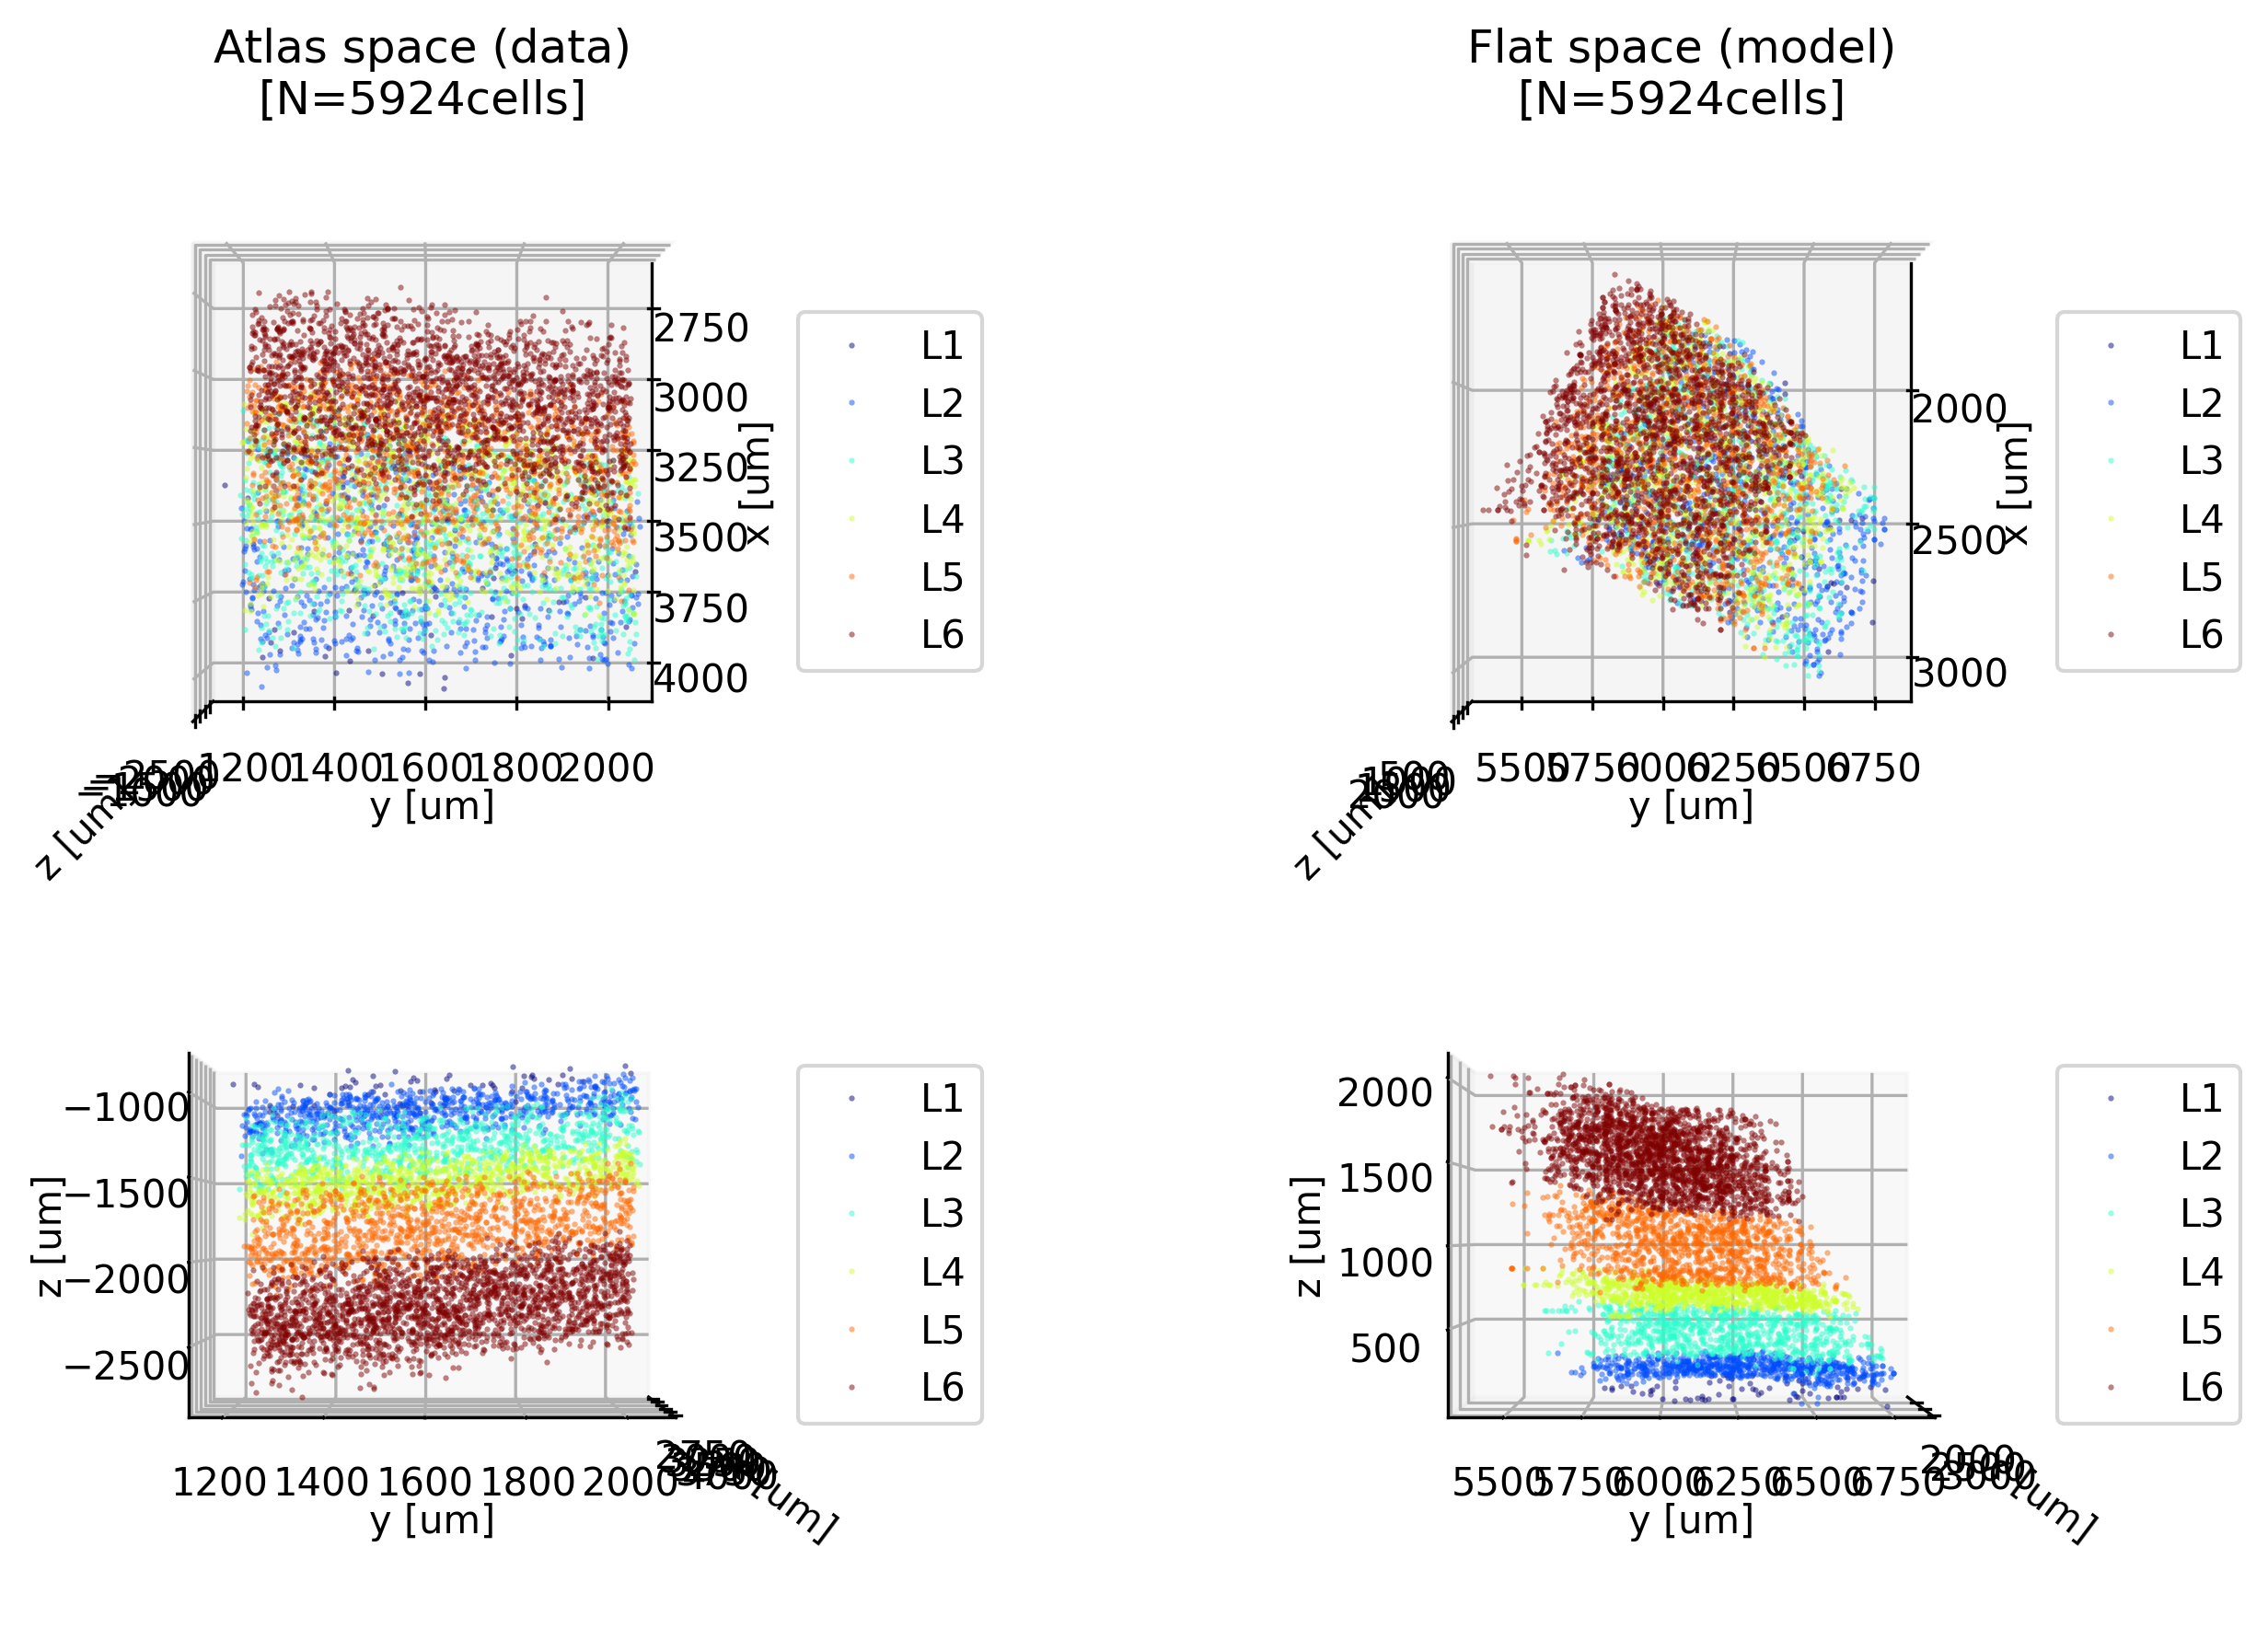

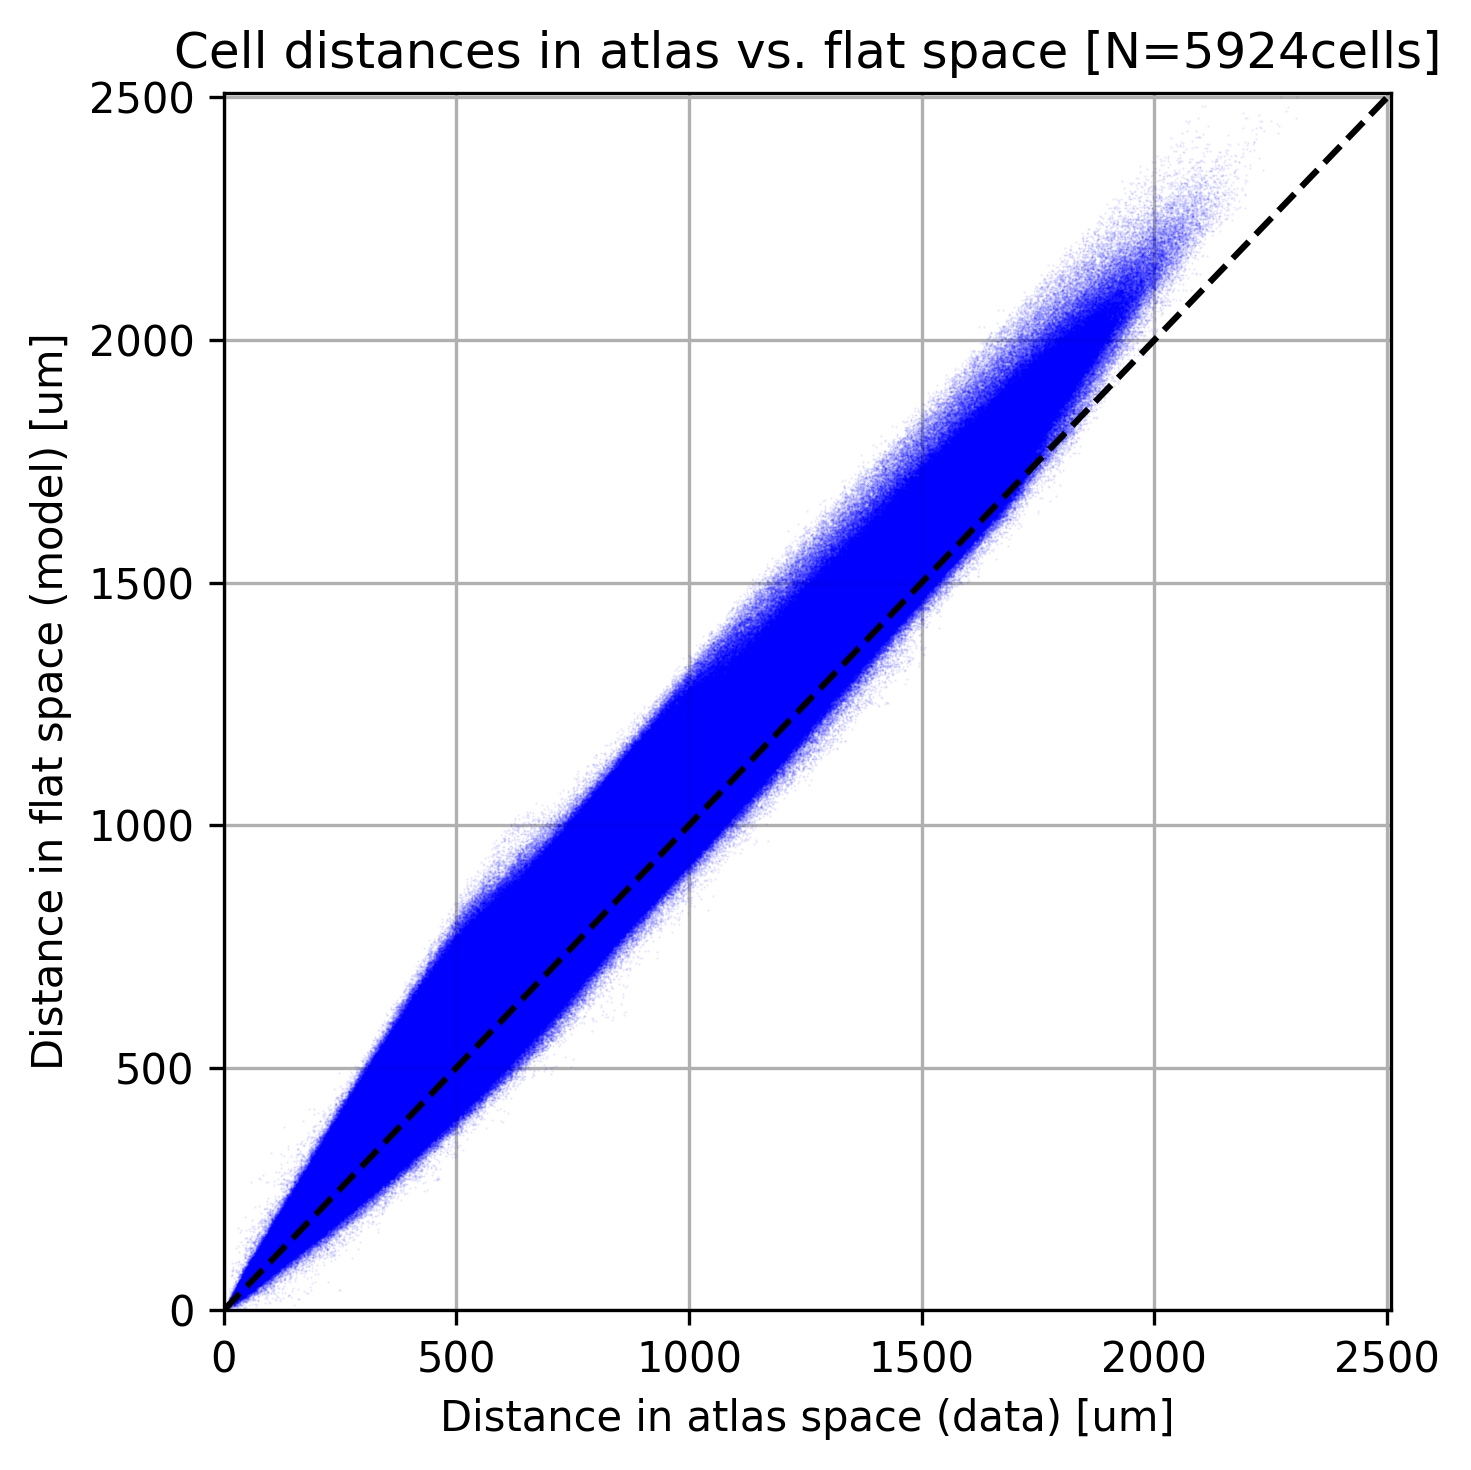

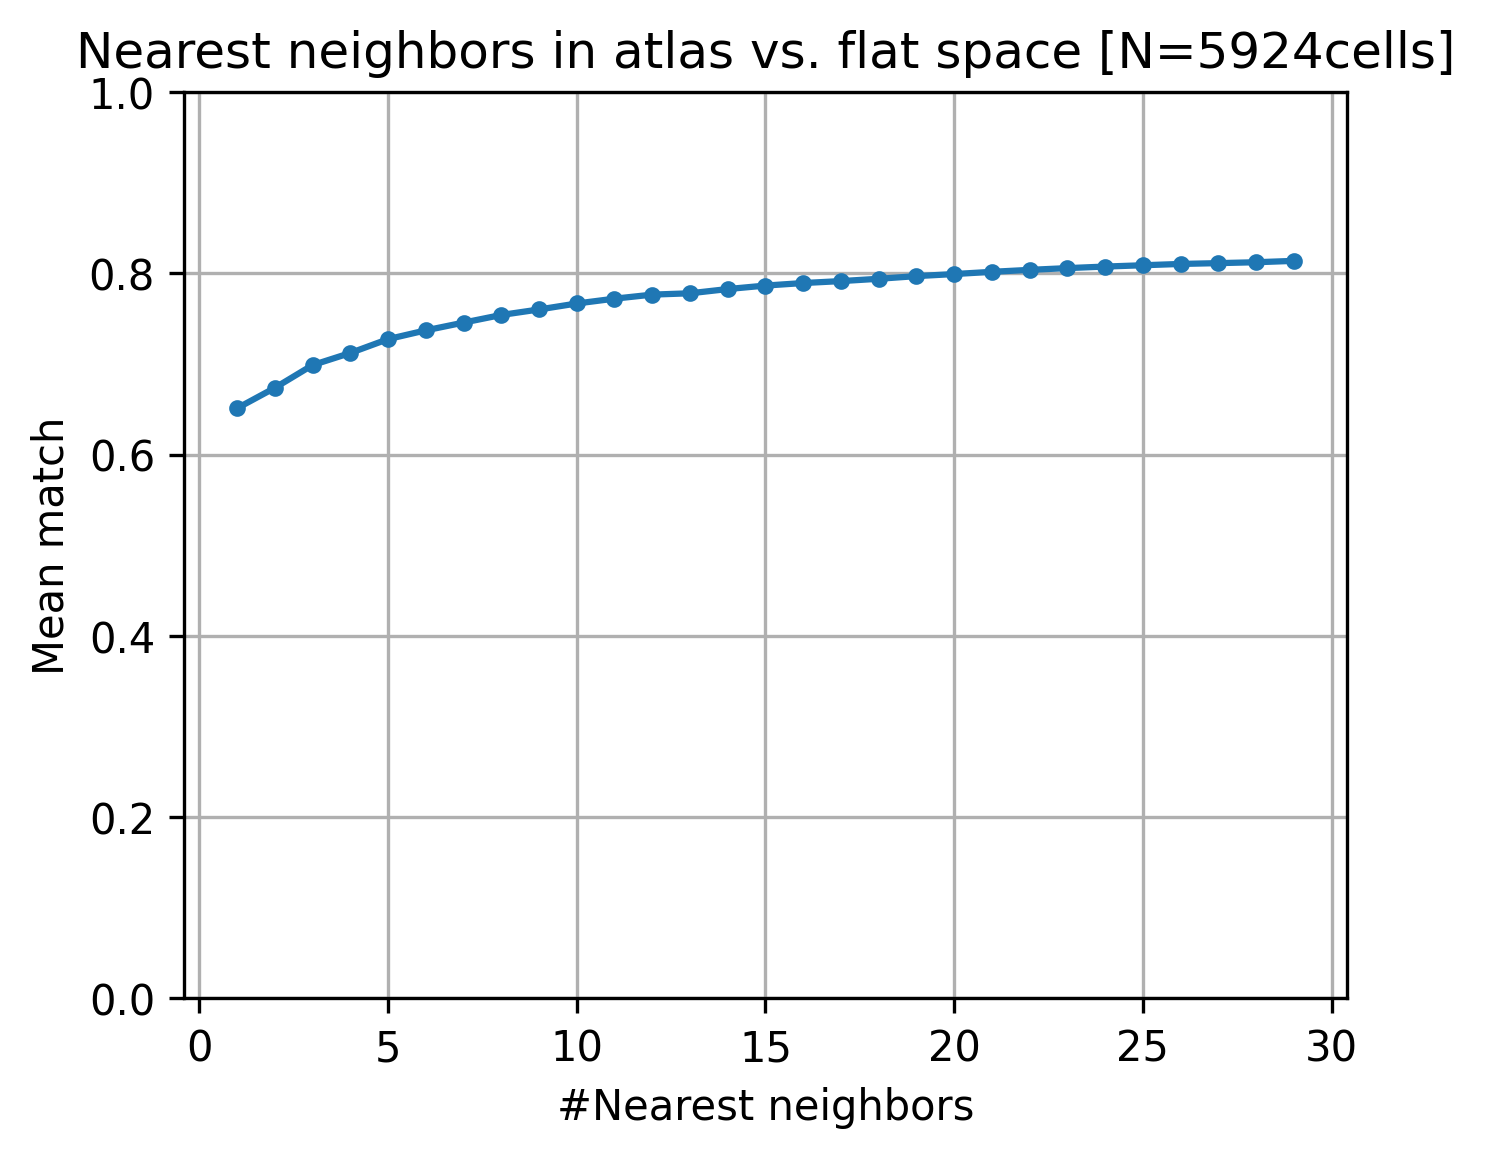

In [2]:
# Model building - Configuration

circuit_path = '/gpfs/bbp.cscs.ch/data/scratch/proj83/home/pokorny/circuit-build-S1_v1'
circuit_name = os.path.split(circuit_path)[-1]
circuit_config = os.path.join(circuit_path, 'sonata', 'circuit_config.json')

# circuit_path = manip_config['circuit_path']
# circuit_name = f'{os.path.split(circuit_path)[-1]}__{manip_config["manip"]["name"]}'
# circuit_config = os.path.join(manip_config['circuit_path'], 'sonata', f'circuit_config_{manip_config["manip"]["name"]}.json')

model_config = {}

""" General settings """
model_config['working_dir'] = os.path.join('..', 'working_dir', 'model_building', circuit_name)
model_config['out_dir'] = os.path.join('figures', circuit_name)
model_config['seed'] = 7531

""" Model specifications """
model_config['circuit_config'] = circuit_config
# model_config['model'] = {'name': 'DistDepDelay', 'fct': {'source': 'delay', 'kwargs': {'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnPropsPerMType', 'fct': {'source': 'conn_props', 'kwargs': {'min_sample_size_per_group': 10, 'max_sample_size_per_group': 100}}}
# model_config['model'] = {'name': 'ConnProb1stOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 1, 'sample_size': 1000}}}
# model_config['model'] = {'name': 'ConnProb2ndOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 2, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb3rdOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 3, 'sample_size': 1000, 'bin_size_um': 100, 'max_range_um': None}}}
# model_config['model'] = {'name': 'ConnProb4thOrder', 'fct': {'source': 'conn_prob', 'kwargs': {'order': 4, 'sample_size': 2000, 'bin_size_um': 40, 'max_range_um': 500, 'n_estimators': 500, 'max_depth': None}}}
model_config['model'] = {'name': 'FlatPosMapping', 'fct': {'source': 'pos_mapping', 'kwargs': {'flatmap_path': '/gpfs/bbp.cscs.ch/project/proj83/home/bolanos', 'flatmap_files': ['BB_Rat_SSCX_flatmap_v2', 'BB_Rat_SSCX_flatmap_v2_depths'], 'xy_scale': None}}}

# Model building - Run
model_building.main(model_config, True, force_recomp=True)